In [1]:
using Pkg
Pkg.activate(".")
#Pkg.resolve()
#Pkg.instantiate()

using YAXArrays
using Zarr
using Dates

  Activating project at `~/git/spatio_temporal_data-rainforest_development`


  No Changes to `~/git/spatio_temporal_data-rainforest_development/Project.toml`
  No Changes to `~/git/spatio_temporal_data-rainforest_development/Manifest.toml`


In [2]:

include("src/rainforest_lib.jl")
using .Rainforestlib

lc = Rainforestlib.get_lcc_datacube()
filtered_dc = Rainforestlib.rough_spatial_filter(lc; time_bounds = (Date(2010), Date(2021)))


include("src/categories.jl")
# set a set of accepted values
rainforest_values = Set(RainforestCategories.categories["rainforest"].lccs_classes)
forest_values = Set(RainforestCategories.categories["forest"].lccs_classes)
all_forest_values = union(forest_values, rainforest_values)


Set{String} with 13 elements:
  "tree_needleleaved_evergreen_open"
  "tree_needleleaved_deciduous_closed"
  "tree_needleleaved_deciduous_open"
  "tree_needleleaved_deciduous_closed_to_open"
  "tree_broadleaved_deciduous_open"
  "tree_broadleaved_deciduous_closed"
  "tree_broadleaved_evergreen_closed_to_open"
  "tree_cover_flooded_saline_water"
  "tree_needleleaved_evergreen_closed"
  "tree_mixed"
  "tree_broadleaved_deciduous_closed_to_open"
  "tree_cover_flooded_fresh_or_brakish_water"
  "tree_needleleaved_evergreen_closed_to_open"

In [ ]:
# WARNING: do not try this with the huge datacube, it wont work. The in function needs to be ported to datacubes, the native one is not working
# to create the world map, simply set local_map=false
global_figure = Rainforestlib.build_figure_by_lcc_classes(lc, accepted_values, false)

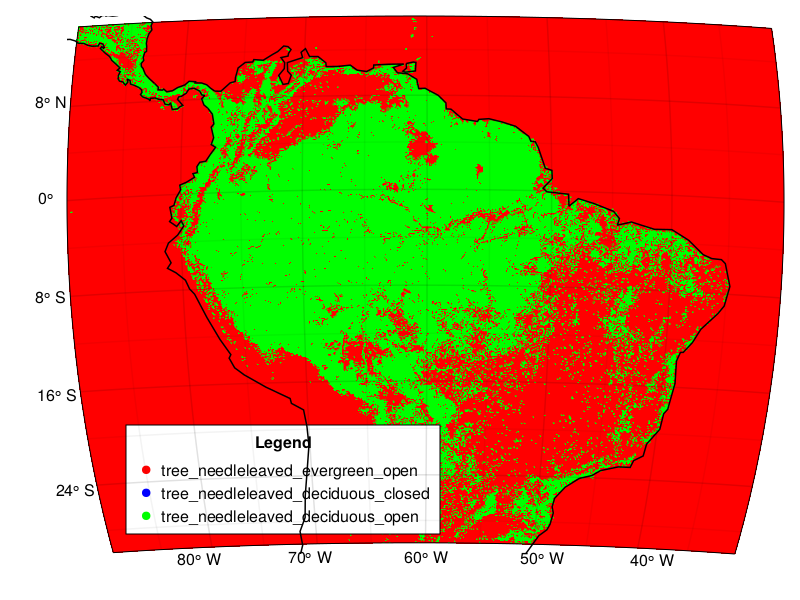

In [18]:
#using .Rainforestlib

# local is the default, and makes the map as large as the datapoints
# but can me changed by setting 

searched_values = all_forest_values

using Colors, ColorSchemes

custom_colormap = [
    RGB(1.0, 0.0, 0.0),  # Red
    RGB(0.0, 0.0, 1.0),  # Blue
    RGB(0.0, 1.0, 0.0)   # Green
]


local_figure = Rainforestlib.build_figure_by_lcc_classes(filtered_dc, searched_values; colormap = custom_colormap, colorrange=(1,2))


using CairoMakie

xs = 0:0.5:10
ys = sin.(xs)

points = [scatter!(xs, sin.(xs .* i), color = color)
    for (i, color) in zip(1:length(custom_colormap), custom_colormap)]

# xs = 0:0.1:10
# lins = [lines!(xs, sin.(xs .* i), color = color)
#     for (i, color) in zip(1:3, [:red, :blue, :green])]

# xs = 0:0.1:10
# lins = [lines!(xs, sin.(xs .+ 3v), color = RGBf(v, 0, 1-v)) for v in 0:0.1:0.2]

Legend(
    local_figure[1, 1], 
    points,
    ["$lcss_class" for lcss_class in first(searched_values,3)],
    "Legend",
    tellheight = false,
    tellwidth = false,
    margin = (110, 10, 50, 10),
    halign = :left, valign = :bottom, orientation = :vertical
)

local_figure
